In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score

In [15]:
lde = pd.read_parquet('pred_deb_revised.gzip')
lro = pd.read_parquet('pred_drob_revised.gzip')
de = pd.read_parquet('pred_deb_nolora.gzip')
ro = pd.read_parquet('pred_drob_nolora.gzip')

In [11]:
ground = pd.read_parquet('test_deb_fsb_revised.gzip')
# glro = pd.read_parquet('test_drob_fsb_revised.gzip')
# globalde = pd.read_parquet('test_deb_fsb_nolora.gzip')
# gro = pd.read_parquet('test_drob_fsb_nolora.gzip')

In [19]:
groundtags = np.argmax(ground.target.tolist(), axis=-1)
groundtags

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

In [21]:
o1 = [0 if i['label']=='LABEL_0' else 1 for i in lde.output.tolist()]
o2 = [0 if i['label']=='LABEL_0' else 1 for i in lro.output.tolist()]
o3 = [0 if i['label']=='LABEL_0' else 1 for i in de.output.tolist()]
o4 = [0 if i['label']=='LABEL_0' else 1 for i in ro.output.tolist()]

In [22]:
print(f1_score(groundtags, o1))
print(f1_score(groundtags, o2))
print(f1_score(groundtags, o3))
print(f1_score(groundtags, o4))
print(f1_score(o3, o4))

0.9901865762054762
0.9890479178897504
0.9898577662841442
0.9893957178127655
0.9962929770246048


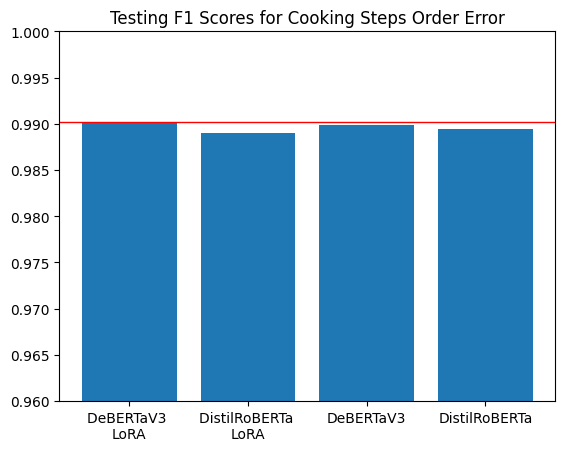

In [34]:
import matplotlib.pyplot as plt

x = np.array(["DeBERTaV3 \nLoRA", "DistilRoBERTa \nLoRA", "DeBERTaV3", "DistilRoBERTa"])
y = np.array([f1_score(groundtags, o1), f1_score(groundtags, o2), f1_score(groundtags, o3), f1_score(groundtags, o4)])

plt.bar(x,y)
plt.title('Testing F1 Scores for Cooking Time Error Approach 1')
plt.ylim(0.96,1)
plt.axhline(y=max([f1_score(groundtags, o1), f1_score(groundtags, o2), f1_score(groundtags, o3), f1_score(groundtags, o4)]),linewidth=1, color='red')
plt.show()